# Add Introduction!!!

## Imports

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# FIXME: Remove the two first instructions
import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset


In [2]:
DATASET_PATH= './Data'
ds = Dataset(path=DATASET_PATH)

In [3]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 10


In [21]:
#FIXME: Change function name. Change dp and ds names
#TODO: Add percentages
def category_pie(ds, attribute_getter, figure_name):
    def count_categories():
        categories = []
        for dp in ds:
            categories += [attribute_getter(dp)]

        return Counter(categories)
    count_dict = count_categories()
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys())

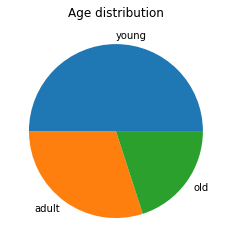

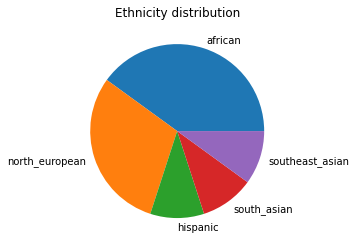

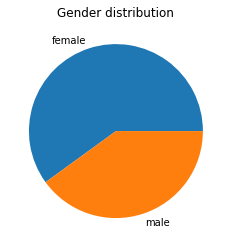

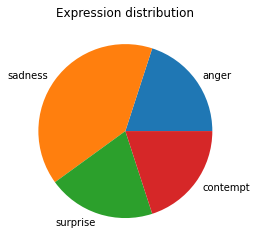

In [26]:
category_pie(ds, lambda dp : dp.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.face_expression.name, 'Expression distribution')